In [1]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

In [2]:
engine = create_engine('sqlite:///hawaii_engine.sqlite')

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
session = Session(engine)

In [8]:
list(Measurement.__table__.columns)

[Column('id', FLOAT(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', VARCHAR(), table=<measurement>),
 Column('date', VARCHAR(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [9]:
list(Station.__table__.columns)

[Column('station', VARCHAR(length=255), table=<station>, primary_key=True, nullable=False),
 Column('name', VARCHAR(length=255), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [10]:
measurement_data_count = session.query(Measurement).count()
print(measurement_data_count)

18103


In [11]:
station_data_count = session.query(Station).count()
print(station_data_count)

9


In [13]:
prcp_query = (session
         .query(Measurement.date, Measurement.prcp)
         .filter(Measurement.id >= 19201)
         .all())

In [14]:
prcp_query_df = pd.DataFrame(prcp_query)
prcp_query_df.columns = ['Date','Precipitation']
prcp_query_df.head()

,Date,Precipitation
0,2016-08-23,0.70
1,2016-08-24,1.45
2,2016-08-25,0.11
3,2016-08-28,2.07
4,2016-08-29,0.90


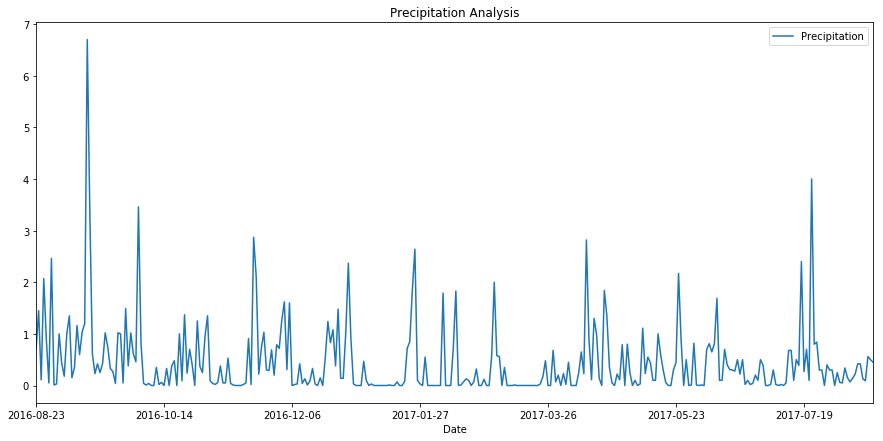

In [15]:
#Precipitation Analysis

prcp_query_df.plot(x="Date", y='Precipitation', figsize=(15,7))
plt.title('Precipitation Analysis')
plt.show()

In [16]:
station_count = session.query(Measurement).group_by(Measurement.station).count()
print('Number of Stations: ' + str(station_count))

Number of Stations: 9


In [17]:
#Station Analysis
first_station = session.query(Measurement.station).filter(Measurement.station == 'USC00519281').count()
second_station = session.query(Measurement.station).filter(Measurement.station == 'USC00513117').count()
third_station = session.query(Measurement.station).filter(Measurement.station == 'USC00519397').count()
fourth_station = session.query(Measurement.station).filter(Measurement.station == 'USC00519523').count()
fifth_station = session.query(Measurement.station).filter(Measurement.station == 'USC00516128').count()
sixth_station = session.query(Measurement.station).filter(Measurement.station == 'USC00514830').count()
seventh_station = session.query(Measurement.station).filter(Measurement.station == 'USC00511918').count()
eight_station = session.query(Measurement.station).filter(Measurement.station == 'USC00517948').count()
ninth_station = session.query(Measurement.station).filter(Measurement.station == 'USC00518838').count()

In [18]:
station_list_data = [('USC00519281', first_station), ('USC00513117', second_station),
                    ('USC00519397', third_station),('USC00519523', fourth_station),
                    ('USC00516128', fifth_station), ('USC00514830', sixth_station),
                    ('USC00511918', seventh_station), ('USC00517948', eight_station),
                    ('USC00518838', ninth_station)]
station_count_df = pd.DataFrame(station_list_data)
station_count_df.columns = ['Station', 'Observation Counts']
station_count_df

,Station,Observation Counts
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [19]:
tobs_query = (session
              .query(Measurement.date, Measurement.tobs)
              .filter(Measurement.id >= 19201)
              .all())         

In [20]:
tobs_query_df = pd.DataFrame(tobs_query)
tobs_query_df.head()

,date,tobs
0,2016-08-23,74.0
1,2016-08-24,74.0
2,2016-08-25,77.0
3,2016-08-28,71.0
4,2016-08-29,78.0


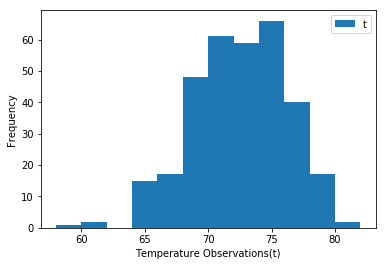

In [22]:
plt.hist(tobs_query_df['tobs'], bins = 12)
plt.legend('tobs')
plt.ylabel('Frequency')
plt.xlabel('Temperature Observations(t)')
plt.show()

In [ ]:
#def calc_types():
    
    

In [23]:
from flask import Flask, jsonify
app = Flask(__name__)

In [24]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    precip_list = []
    for prcp_data in prcp_query:
        row = {}
        row['date'] = prcp_data[0]
        row['precipitation'] = prcp_data[1]
        precip_list.append(row)
    return jsonify(precip_list)

In [25]:
@app.route("/api/v1.0/stations")
def stations():
    return jsonify(station_list_data)
    

In [27]:
#@app.route("/api/v1.0/tobs")
#def tobs():
    

In [ ]:
if __name__ == '__main__':
    app.run()